# Описание датасета "S&P 500 Companies with Financial Information"

[![Kaggle](https://img.shields.io/badge/Kaggle-Dataset-blue.svg)](https://www.kaggle.com/datasets/paytonfisher/sp-500-companies-with-financial-information)

## Общая информация

РЕМАРКА: ИЗНАЧАЛЬНЫЙ EDA был сделан на базе изначального датасета (файл financials_initialDataset.csv)
Потом мы обновили, и сохранили в итоговый financials.csv, поэтому все аналитические выводы были 
подготовлены на основе другого файла. Для сравнения, можно заменить 
data = pd.read_csv('financials.csv', sep=',') на 
data = pd.read_csv('financials_initialDataset.csv', sep=',')

чтобы увидеть изначальное состояние датасета


- **Период данных**: Июль 2020 года
- **Количество компаний**: 505
- **Количество столбцов**: 14
- **Тип данных**: Финансовые показатели компаний S&P 500

## Структура данных

### Категориальные переменные (4)

| Столбец | Описание |
|---------|-----------|
| `Symbol` | Тикер компании на бирже (уникальный идентификатор) |
| `Name` | Полное официальное название компании |
| `Sector` | Экономический сектор деятельности компании |
| `SEC Filings` | Ссылки на отчетность в SEC (10-K, 10-Q) |

### Числовые переменные (10)

| Столбец | Описание | Метрика |
|---------|-----------|---------|
| `Price` | Цена одной акции | Абсолютная |
| `Price/Earnings`  | Коэффициент Цена/Прибыль | Относительная |
| `Dividend Yield` | Дивидендная доходность  | Относительная |
| `Earnings/Share`  | Прибыль на акцию  | Абсолютная |
| `52 Week Low` | Минимальная цена за 52 недели  | Абсолютная |
| `52 Week High` | Максимальная цена за 52 недели  | Абсолютная |
| `Market Cap` | Рыночная капитализация  | Абсолютная |
| `EBITDA` | Прибыль до вычетов  | Абсолютная |
| `Price/Sales`  | Коэффициент Цена/Выручка | Относительная |
| `Price/Book`  | Коэффициент Цена/Балансовая стоимость | Относительная |

## Распределение по секторам

Наиболее представленные сектора:
- **Consumer Discretionary**: 17%
- **Information Technology**: 14%
- **Остальные сектора**: 70%

## Пример строки данных

| Symbol | Name | Sector | Price | P/E | Dividend Yield | EPS | 52W Low | 52W High | Market Cap |
|--------|------|---------|-------|-----|----------------|-----|---------|----------|------------|
| MMM | 3M Company | Industrials | 222.89 | 24.31 | 2.33 | 9.17 | 142.00 | 239.00 | 128.4B |

## Ключевые финансовые метрики

### Мультипликаторы оценки
- **P/E (Price/Earnings)**: Оценка стоимости акции относительно прибыли
- **P/S (Price/Sales)**: Оценка относительно выручки
- **P/B (Price/Book)**: Оценка относительно балансовой стоимости

### Показатели доходности
- **Dividend Yield**: Доходность по дивидендам
- **EPS**: Прибыльность компании на акцию

### Рыночные показатели
- **Market Cap**: Размер компании
- **52 Week High/Low**: Волатильность акции

## Примечания

1. Данные актуальны на июль 2020 года
2. Некоторые показатели могут иметь отрицательные значения (убыточные компании)
3. Market Cap представлен в различных диапазонах (от миллиардов до триллионов)
4. Для полного анализа рекомендуется дополнить данные текущей информацией

### 🎯 Целевая переменная (Target Variable)

**Рекомендуемая целевая переменная:** `Market Cap` (Рыночная капитализация)

**Обоснование:**
- Рыночная капитализация является прямой оценкой стоимости компании рынком
- Рассчитывается как `Цена акции × Количество акций`
- Наиболее точно отражает реальную стоимость компании
- Широко используется в финансовом анализе для оценки компаний

### Признаки для модели (Features)

#### Основные финансовые показатели:
| Признак | Тип | Обоснование |
|---------|-----|-------------|
| `Price/Earnings` (P/E) | Числовой | Отражает оценку компании относительно прибыли |
| `Earnings/Share` (EPS) | Числовой | Показывает прибыльность на акцию |
| `EBITDA` | Числовой | Операционная прибыль до вычетов |
| `Price/Sales` (PS) | Числовой | Оценка относительно выручки |
| `Price/Book` (PB) | Числовой | Оценка относительно балансовой стоимости |
| `Dividend Yield` | Числовой | Доходность для инвесторов |

#### Рыночные показатели:
| Признак | Тип | Обоснование |
|---------|-----|-------------|
| `52 Week High` | Числовой | Максимальная оценка рынка |
| `52 Week Low` | Числовой | Минимальная оценка рынка |

#### Категориальные признаки:
| Признак | Тип | Преобразование |
|---------|-----|----------------|
| `Sector` | Категориальный | One-Hot Encoding |


In [44]:
%pip install ydata_profiling

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [45]:
%pip install phik
#!pip install phik

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
%matplotlib inline
# Импортируем необходимые библиотеки
import numpy as np  # Для математических операций и работы с массивами
import pandas as pd  # Для работы с табличными данными
import matplotlib.pyplot as plt  # Для построения графиков
import seaborn as sns  # Для визуализации данных (более красивые графики)
from ydata_profiling import ProfileReport  # Для автоматического анализа данных
from sklearn.linear_model import LinearRegression  # Модель линейной регрессии
from sklearn.preprocessing import StandardScaler  # Для стандартизации данных
from sklearn.model_selection import train_test_split  # Для разделения на train/test
from sklearn.linear_model import LogisticRegression  # Модель логистической регрессии
from sklearn.preprocessing import PolynomialFeatures  # Для создания полиномиальных признаков
from sklearn.metrics import mean_squared_error, root_mean_squared_error  # Метрики ошибок
from sklearn.metrics import r2_score  # Метрика качества R²
import phik  # Для расширенного анализа корреляций
from phik.report import plot_correlation_matrix  # Для визуализации матрицы корреляций
from sklearn.preprocessing import OneHotEncoder  # Для кодирования категориальных переменных
from sklearn.impute import SimpleImputer  # Для заполнения пропущенных значений
from sklearn.pipeline import make_pipeline  # Для создания пайплайнов обработки
from sklearn.model_selection import cross_validate, KFold  # Для кросс-валидации
from sklearn.preprocessing import RobustScaler  # ← теперь RobustScaler

In [3]:
# Загружаем датасет с данными
data = pd.read_csv('financials.csv', sep=',')

- 'Symbol'       : Тикер компании - уникальный идентификатор, не несет прогностической силы для модели
- 'Name'         : Название компании - текстовая информация, не используется в численных моделях
- 'SEC Filings'  : Ссылки на документы - неструктурированные данные, сложны для анализа
- 'Price'        : Цена акции - удаляем чтобы избежать data leakage, так как Market Cap = Price × Количество акций

In [4]:
# Оценим пропуски
empty_fields = data[(data['Price/Earnings'].isna() & data['Price/Book'].isna()) ]
empty_fields

Empty DataFrame
Columns: [Symbol, Name, Sector, Price, Price/Earnings, Dividend Yield, Earnings/Share, 52 Week Low, 52 Week High, Market Cap, EBITDA, Price/Sales, Price/Book, SEC Filings]
Index: []

In [5]:
# Предположим мы сделали парсер и достали недостающие значения парсером#
# Заполняем пропуски недостающими значениями по состоянию на июнь 2020 г
# данные реальные, взяты с сайта из https://companiesmarketcap.com/
def fillNan():
    fill_values = {
        'Price/Book': {
                'ARNC': 2.25,
                'FL': 1.27,
                'HCA': 57.7,
                'MRO': 0.43,
                'OXY': 0.72,
                'PEP': 14.6,
                'TDG': -5.73,
                'UNP': 6.97
        },
        'Price/Earnings': {
                'PRGO': 23.8,
                'TPR': -4.99
        }
    }   

    for column, symbols in fill_values.items():
        for symbol, value in symbols.items():
            data.loc[(data[column].isna()) & (data['Symbol'] == symbol), column] = value

fillNan()


In [6]:
# Добавим в качестве признаков дополнительные столбцы, рассчитанные из имеющихся данных
data['Earnings'] = data['Price'] / data['Price/Earnings']
data['Sales'] = data['Price'] / data['Price/Sales']
data['Book'] = data['Price'] / data['Price/Book']

In [7]:
# УДАЛЕНИЕ НЕНУЖНЫХ СТОЛБЦОВ ИЗ ДАТАСЕТА
df = data.drop(['Symbol', 'Name', 'SEC Filings', 'Price', 'Price/Earnings', 'Price/Sales', 'Price/Book'], axis=1)

Общая информация:

- 505 компаний из S&P 500


In [8]:
# Выводим описание данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector          505 non-null    object 
 1   Dividend Yield  505 non-null    float64
 2   Earnings/Share  505 non-null    float64
 3   52 Week Low     505 non-null    float64
 4   52 Week High    505 non-null    float64
 5   Market Cap      505 non-null    float64
 6   EBITDA          505 non-null    float64
 7   Earnings        505 non-null    float64
 8   Sales           505 non-null    float64
 9   Book            505 non-null    float64
dtypes: float64(9), object(1)
memory usage: 39.6+ KB


In [9]:
# АНАЛИЗ ПЕРВЫХ СТРОК ДАННЫХ
df.head()

Sector  Dividend Yield  Earnings/Share  52 Week Low  \
0             Industrials        2.332862            7.92       259.77   
1             Industrials        1.147959            1.70        68.39   
2             Health Care        1.908982            0.26        64.60   
3             Health Care        2.499560            3.29       125.86   
4  Information Technology        1.714470            5.44       162.60   

   52 Week High    Market Cap        EBITDA  Earnings      Sales       Book  
0       175.490  1.387211e+11  9.048000e+09  9.168655  50.769079  19.655203  
1        48.925  1.078342e+10  6.010000e+08  2.170029  16.848075   9.486614  
2        42.280  1.021210e+11  5.744000e+09  2.499778  15.043522  17.639498  
3        60.050  1.813863e+11  1.031000e+10  5.588872  17.242116   4.149962  
4       114.820  9.876586e+10  5.643228e+09  5.909305  57.796942  14.172316

PRICE/EARNINGS (P/E) RATIO:
- Среднее: 24.81 (типичное значение для рынка)
- Стандартное отклонение: 41.24 (высокая волатильность)
- Минимум: -251.53 (убыточные компании)
- Максимум: 520.15 (сильно переоцененные компании или выбросы)
- Медиана: 19.45 (более репрезентативна чем среднее)

Есть экстремальные выбросы, требуется обработка

DIVIDEND YIELD:
- Среднее: 1.90% (типичная дивидендная доходность)
- Максимум: 12.66% (компании с высокими дивидендами)
- 25% компаний: <0.79% (низкие дивиденды)
- 75% компаний: >2.78% (высокие дивиденды)

Нормальное распределение, мало выбросов

EARNINGS/SHARE (EPS):
- Среднее: 3.75 (средняя прибыль на акцию)
- Минимум: -28.01 (убыточные компании)
- Максимум: 44.09 (высокоприбыльные компании)
- Медиана: 2.89 (более репрезентативна)

Есть убыточные компании, распределение асимметрично

52 WEEK HIGH/LOW:
- Диапазон цен: 2.80 - 1589.00 (огромный разброс)
- Средний максимум: 83.54, Средний минимум: 122.62

Отражает разные ценовые уровни акций

MARKET CAP (Целевая переменная):
- Среднее: 49.2 млрд $
- Медиана: 21.4 млрд $ (распределение скошено вправо)
- Минимум: 2.6 млрд $ (мелкие компании)
- Максимум: 809.5 млрд $ (гиганты как Apple, Microsoft)

Сильно скошенное распределение, требуется логарифмирование

EBITDA:
- Среднее: 3.59 млрд $
- Минимум: -5.07 млрд $ (убыточные компании)
- Максимум: 79.39 млрд $ (высокоприбыльные компании)

Есть компании с отрицательной EBITDA

PRICE/SALES (P/S) и PRICE/BOOK (P/B):
- P/S: в среднем 3.94, максимум 20.09
- P/B: в среднем 14.45, но медиана всего 3.40 (сильные выбросы!)
- P/B максимум: 1403.38 - выброс

P/B имеет экстремальные выбросы, требует особой обработки

In [10]:
df.describe()

Dividend Yield  Earnings/Share  52 Week Low  52 Week High  \
count      505.000000      505.000000   505.000000    505.000000   
mean         1.895953        3.753743   122.623832     83.536616   
std          1.537214        5.689036   155.362140    105.725473   
min          0.000000      -28.010000     6.590000      2.800000   
25%          0.794834        1.490000    56.250000     38.430000   
50%          1.769255        2.890000    86.680000     62.850000   
75%          2.781114        5.140000   140.130000     96.660000   
max         12.661196       44.090000  2067.990000   1589.000000   

         Market Cap        EBITDA    Earnings       Sales        Book  
count  5.050000e+02  5.050000e+02  505.000000  505.000000  505.000000  
mean   4.923944e+10  3.590328e+09    4.717448   44.206099   28.440851  
std    9.005017e+10  6.840544e+09    5.216427   68.776674   30.542822  
min    2.626102e+09 -5.067000e+09   -9.789579    1.271482  -49.389180  
25%    1.273207e+10  7.739320e+08    2.189702   13.271966   11.397898  
50%    2.140095e+10  1.614399e+09    3.689502   24.916602   20.758794  
75%    4.511968e+10  3.692749e+09    5.891248   50.764591   36.594470  
max    8.095080e+11  7.938600e+10   74.446002  980.702109  260.991329

In [11]:
# СОЗДАНИЕ ДЕТАЛЬНОГО ОТЧЕТА ПО ДАННЫМ С ПОМОЩЬЮ YDATA_PROFILING
profile = ProfileReport(df, title="Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:00<00:00, 380.16it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [12]:
# Отберем числовые признаки
numerical_data = df.select_dtypes(include=['float64'])

In [13]:
# Еще раз рассчитаем матрицу корреляции
correlation_matrix = numerical_data.corr()

<Axes: >

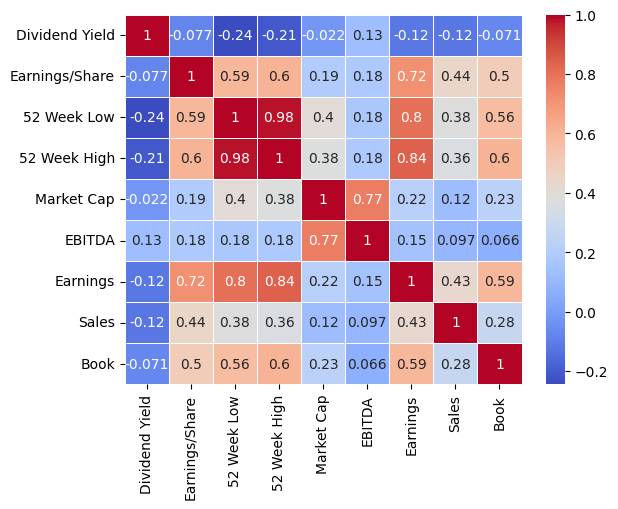

In [54]:
# Вывод матрицы корреляции
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

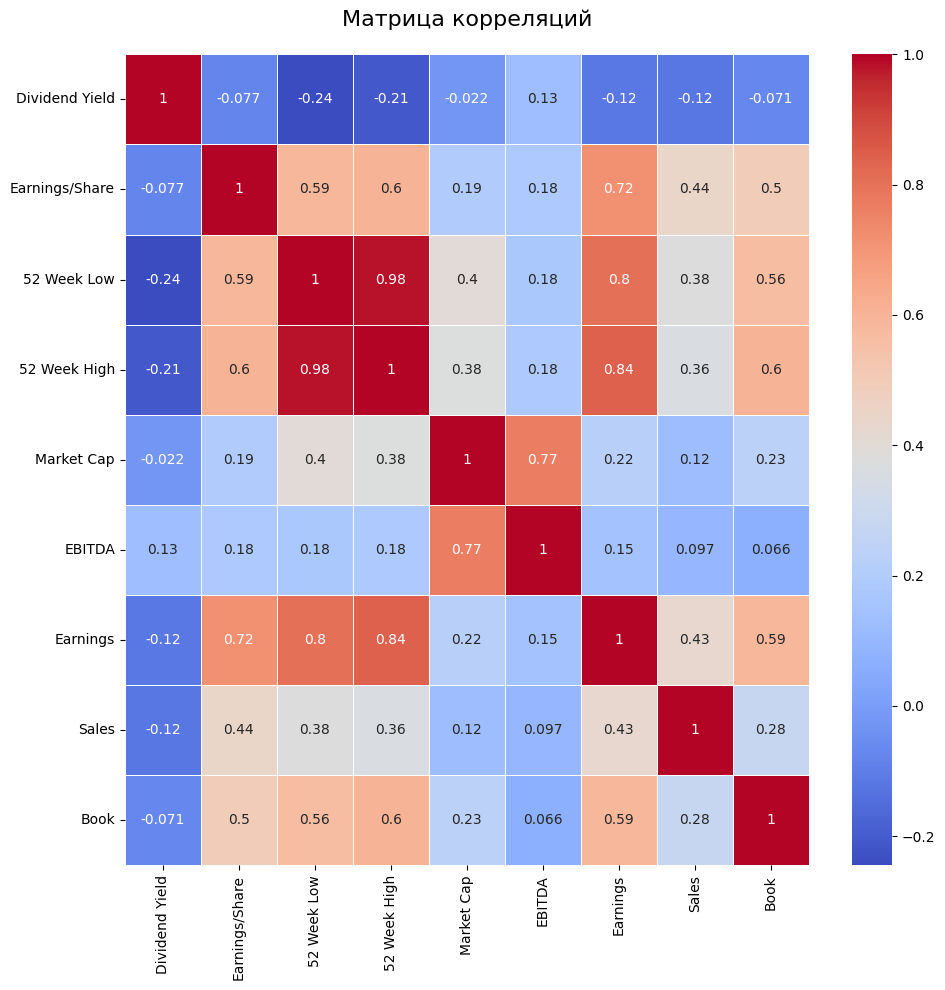

In [14]:
plt.figure(figsize=(10, 10))  # Ширина x Высота в дюймах
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Матрица корреляций', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

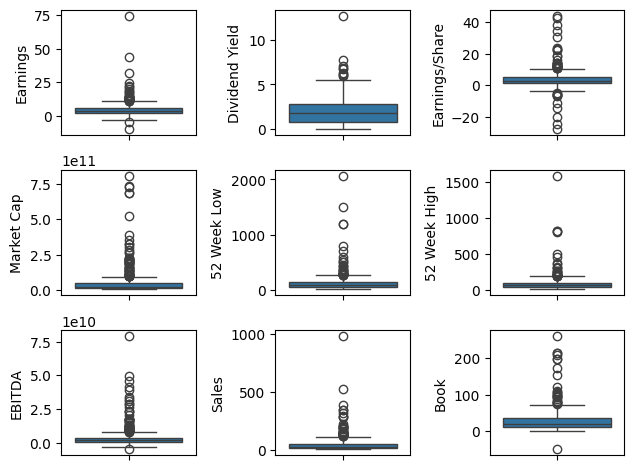

In [15]:
# Построим boxplot - графики зависимости целевой переменной от каждого признака

fig,axs=plt.subplots(ncols=3, nrows=3)

sns.boxplot(y='Earnings', data=df, legend=False, ax=axs[0, 0])
plt.ylabel('Earnings')

sns.boxplot(y='Dividend Yield', data=df, legend=False, ax=axs[0, 1])
plt.ylabel('Dividend Yield')

sns.boxplot(y='Earnings/Share', data=df, legend=False, ax=axs[0, 2])
plt.ylabel('Earnings/Share')

sns.boxplot(y='Market Cap', data=df, legend=False, ax=axs[1, 0])
plt.ylabel('Market Cap')

sns.boxplot(y='52 Week Low', data=df, legend=False, ax=axs[1, 1])
plt.ylabel('52 Week Low')

sns.boxplot(y='52 Week High', data=df, legend=False, ax=axs[1, 2])
plt.ylabel('52 Week High')

sns.boxplot(y='EBITDA', data=df, legend=False, ax=axs[2, 0])
plt.ylabel('EBITDA')

sns.boxplot(y='Sales', data=df, legend=False, ax=axs[2, 1])
plt.ylabel('Sales')

sns.boxplot(y='Book', data=df, legend=False, ax=axs[2, 2])
plt.ylabel('Book')

plt.tight_layout()  # Чтобы избежать наложения графиков
plt.show()

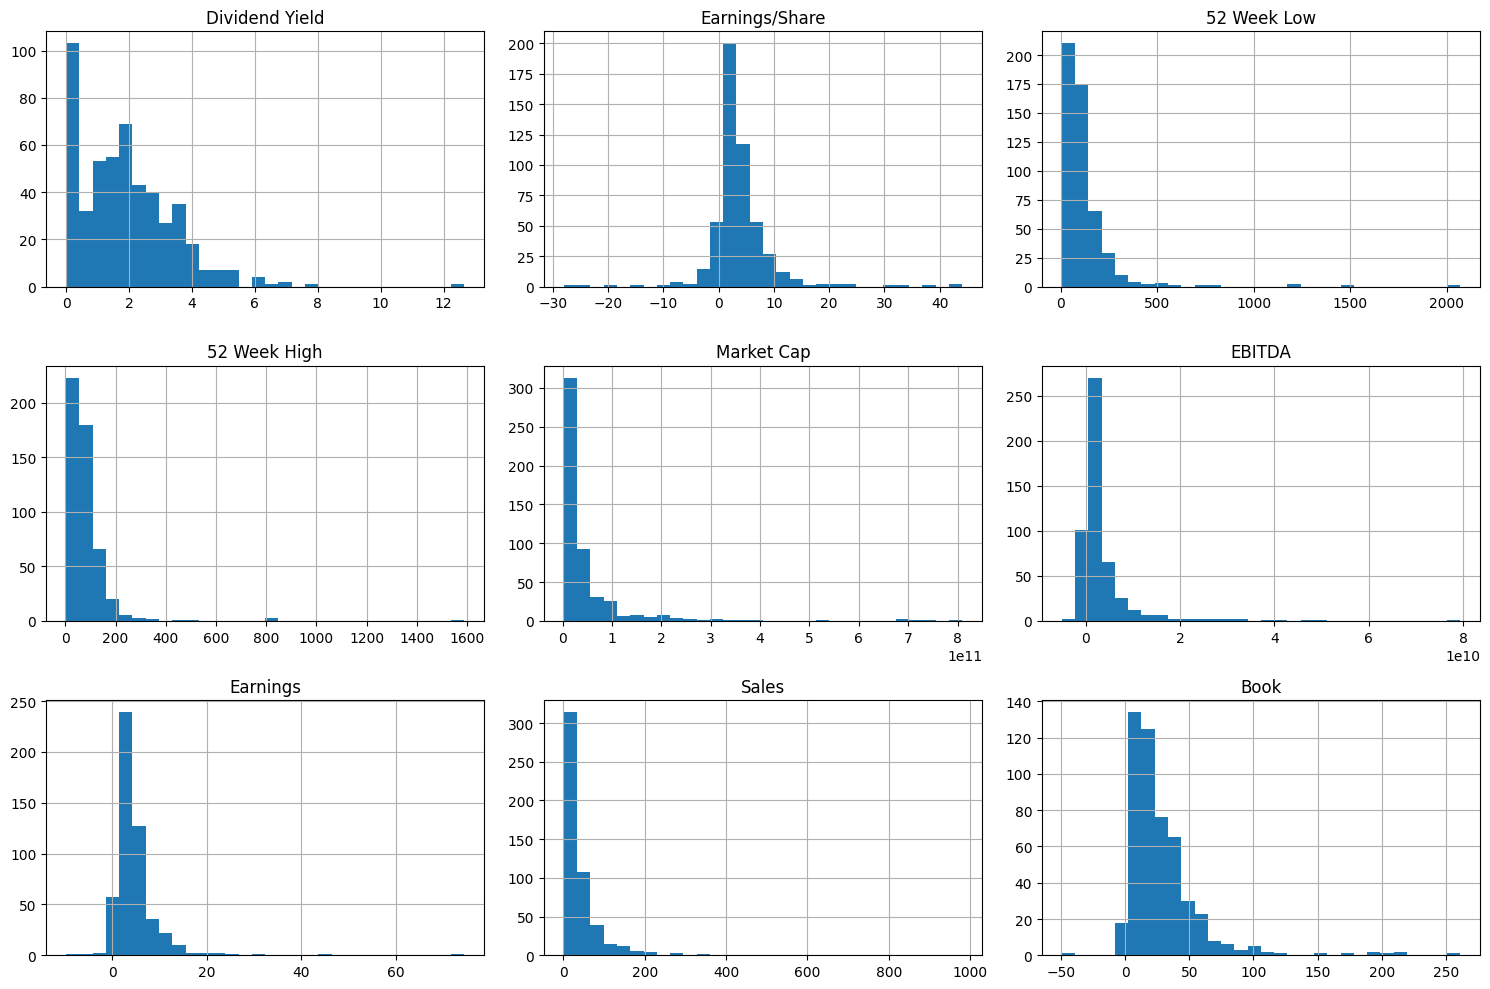

In [16]:
# Гистограммы распределений признакоу
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

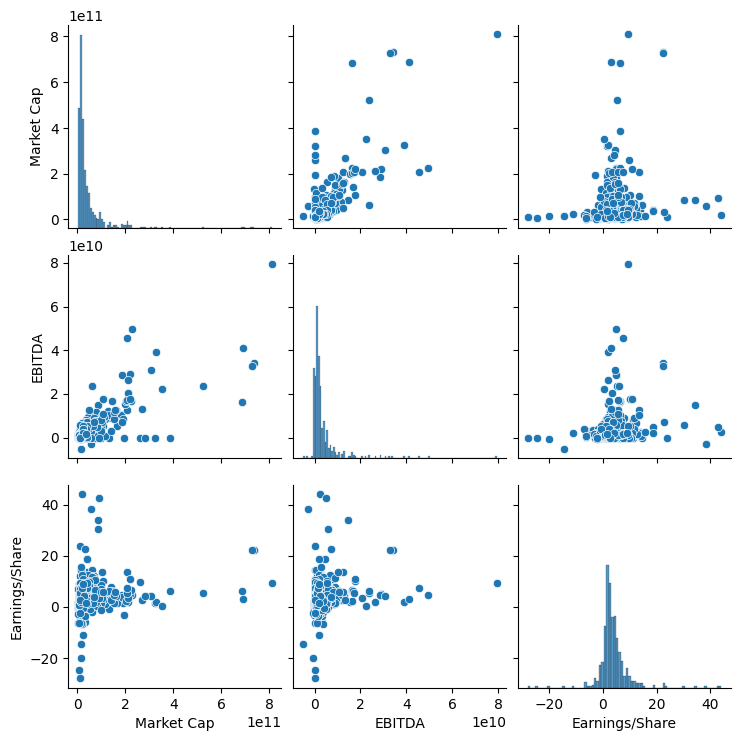

In [17]:
sns.pairplot(df[['Market Cap', 'EBITDA', 'Earnings/Share']])
plt.show()

ЗАМЕНА LABEL ENCODING НА ONE-HOT ENCODING ДЛЯ СТОЛБЦА SECTOR

In [19]:
# ЗАМЕНА LABEL ENCODING НА ONE-HOT ENCODING ДЛЯ СТОЛБЦА SECTOR
print("\n" + "="*50)
print("ПРИМЕНЕНИЕ ONE-HOT ENCODING К СТОЛБЦУ SECTOR (С drop_first=True)")

# Применяем one-hot encoding с drop_first для избежания мультиколлинеарности
df_encoded = pd.get_dummies(
    df,
    columns=['Sector'],
    prefix='Sector',
    drop_first=True,
    dtype=int  # <-- гарантирует, что столбцы будут int, а не bool или object
)

print("Столбцы после one-hot encoding:")
print(df_encoded.columns.tolist())

# Целевая переменная
y = df_encoded['Market Cap']

# Признаки (все остальные столбцы, кроме целевой)
X = df_encoded.drop('Market Cap', axis=1)



ПРИМЕНЕНИЕ ONE-HOT ENCODING К СТОЛБЦУ SECTOR (С drop_first=True)
Столбцы после one-hot encoding:
['Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book', 'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials', 'Sector_Health Care', 'Sector_Industrials', 'Sector_Information Technology', 'Sector_Materials', 'Sector_Real Estate', 'Sector_Telecommunication Services', 'Sector_Utilities']


In [20]:
X

Dividend Yield  Earnings/Share  52 Week Low  52 Week High        EBITDA  \
0          2.332862            7.92       259.77       175.490  9.048000e+09   
1          1.147959            1.70        68.39        48.925  6.010000e+08   
2          1.908982            0.26        64.60        42.280  5.744000e+09   
3          2.499560            3.29       125.86        60.050  1.031000e+10   
4          1.714470            5.44       162.60       114.820  5.643228e+09   
..              ...             ...          ...           ...           ...   
500        1.170079            1.83        76.81        46.860  7.220000e+08   
501        1.797080            4.07        86.93        62.850  2.289000e+09   
502        0.794834            9.01       133.49       108.170  2.007400e+09   
503        1.480933            2.60        55.61        38.430  0.000000e+00   
504        0.682372            1.65        80.13        52.000  1.734000e+09   

     Earnings      Sales       Book  Sector_Consumer Staples  Sector_Energy  \
0    9.168655  50.769079  19.655203                        0              0   
1    2.170029  16.848075   9.486614                        0              0   
2    2.499778  15.043522  17.639498                        0              0   
3    5.588872  17.242116   4.149962                        0              0   
4    5.909305  57.796942  14.172316                        0              0   
..        ...        ...        ...                      ...            ...   
500  2.270200  25.764712  13.227872                        0              0   
501  2.800000  12.084953   0.359770                        0              0   
502  8.067737  36.503577  48.338912                        0              0   
503  2.860124  13.363800  35.711268                        0              0   
504  2.180183   7.705075   3.953013                        0              0   

     Sector_Financials  Sector_Health Care  Sector_Industrials  \
0                    0                   0                   1   
1                    0                   0                   1   
2                    0                   1                   0   
3                    0                   1                   0   
4                    0                   0                   0   
..                 ...                 ...                 ...   
500                  0                   0                   1   
501                  0                   0                   0   
502                  0                   1                   0   
503                  1                   0                   0   
504                  0                   1                   0   

     Sector_Information Technology  Sector_Materials  Sector_Real Estate  \
0                                0                 0                   0   
1                                0                 0                   0   
2                                0                 0                   0   
3                                0                 0                   0   
4                                1                 0                   0   
..                             ...               ...                 ...   
500                              0                 0                   0   
501                              0                 0                   0   
502                              0                 0                   0   
503                              0                 0                   0   
504                              0                 0                   0   

     Sector_Telecommunication Services  Sector_Utilities  
0                                    0                 0  
1                                    0                 0  
2                                    0                 0  
3                                    0                 0  
4                                    0                 0  
..                                 

In [21]:
y

0      1.387211e+11
1      1.078342e+10
2      1.021210e+11
3      1.813863e+11
4      9.876586e+10
           ...     
500    1.291502e+10
501    2.700330e+10
502    2.445470e+10
503    1.067068e+10
504    3.599111e+10
Name: Market Cap, Length: 505, dtype: float64

ВЫЧИСЛЕНИЕ И ВИЗУАЛИЗАЦИЯ МАТРИЦЫ КОРРЕЛЯЦИЙ С ИСПОЛЬЗОВАНИЕМ PHIK

interval columns not set, guessing: ['Dividend Yield', 'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA', 'Earnings', 'Sales', 'Book', 'Sector_Consumer Staples', 'Sector_Energy', 'Sector_Financials', 'Sector_Health Care', 'Sector_Industrials', 'Sector_Information Technology', 'Sector_Materials', 'Sector_Real Estate', 'Sector_Telecommunication Services', 'Sector_Utilities']


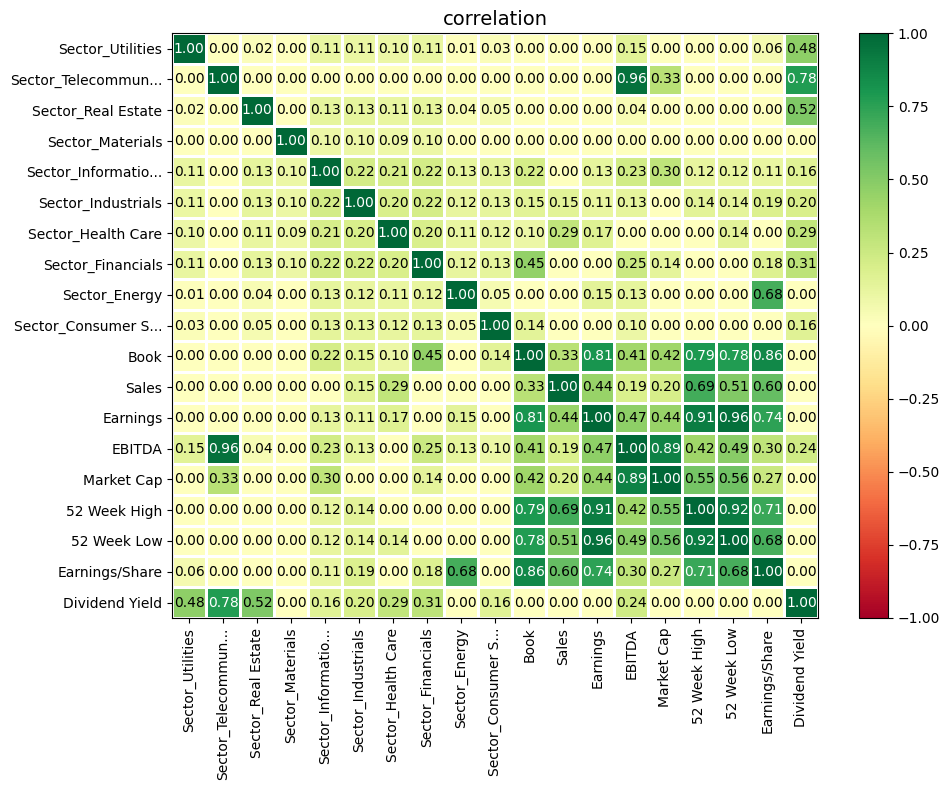

In [22]:
# Вычисляем матрицу корреляций Phi-K
corr_matrix = df_encoded.phik_matrix()
plot_correlation_matrix(corr_matrix.values, x_labels=corr_matrix.columns, y_labels=corr_matrix.index, figsize=(10, 8))

Для начала создадим обычную модель без полиномиальных признаков, чтобы сравнивать качество с ней.

РАЗДЕЛЕНИЕ ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [24]:
X_train

Dividend Yield  Earnings/Share  52 Week Low  52 Week High        EBITDA  \
182        1.352004            2.36       67.540     51.960000  7.216430e+08   
155        1.966102            4.54      126.650     83.230000  1.507000e+09   
280        0.262683            3.38       72.170     43.647053  1.405319e+09   
126        2.049254           -0.65       61.315     42.265000  5.328000e+09   
448        0.609113            3.16       89.920     50.960000  1.097534e+09   
..              ...             ...          ...           ...           ...   
106        0.000000            0.80      499.000    263.000000  4.012930e+08   
270        2.891845            0.01       22.750     16.560000  5.981000e+09   
348        5.443620            1.66       61.360     47.140000  1.851783e+09   
435        0.138145            1.14       62.190     45.000000  1.454000e+09   
102        0.768787            1.61       56.250     37.160000  0.000000e+00   

     Earnings       Sales       Book  Sector_Consumer Staples  Sector_Energy  \
182  2.389549   27.557630  10.875676                        0              0   
155  4.400828   27.741936  11.704705                        1              0   
280  3.850814   51.542239  33.585227                        0              0   
126  0.730015   25.640313  24.648148                        0              1   
448  3.140039   25.560943  12.354642                        0              0   
..        ...         ...        ...                      ...            ...   
106  5.800480  104.220158  43.536825                        0              0   
270  0.670124    5.949143  15.700935                        0              1   
348  1.600000   20.795453  13.498759                        0              1   
435  2.509715   52.171324  21.610895                        0              0   
102  1.639839    6.151241  10.842572                        0              0   

     Sector_Financials  Sector_Health Care  Sector_Industrials  \
182                  0                   0                   1   
155                  0                   0                   0   
280                  0                   0                   0   
126                  0                   0                   0   
448                  0                   0                   0   
..                 ...                 ...                 ...   
106                  0                   0                   0   
270                  0                   0                   0   
348                  0                   0                   0   
435                  0                   0                   1   
102                  1                   0                   0   

     Sector_Information Technology  Sector_Materials  Sector_Real Estate  \
182                              0                 0                   0   
155                              0                 0                   0   
280                              0                 0                   0   
126                              0                 0                   0   
448                              1                 0                   0   
..                             ...               ...                 ...   
106                              0                 0                   0   
270                              0                 0                   0   
348                              0                 0                   0   
435                              0                 0                   0   
102                              0                 0                   0   

     Sector_Telecommunication Services  Sector_Utilities  
182                                  0                 0  
155                                  0                 0  
280                                  0                 0  
126                                  0                 0  
448                                  0                 0  
..                     

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 378 entries, 182 to 102
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     378 non-null    float64
 1   Earnings/Share                     378 non-null    float64
 2   52 Week Low                        378 non-null    float64
 3   52 Week High                       378 non-null    float64
 4   EBITDA                             378 non-null    float64
 5   Earnings                           378 non-null    float64
 6   Sales                              378 non-null    float64
 7   Book                               378 non-null    float64
 8   Sector_Consumer Staples            378 non-null    int64  
 9   Sector_Energy                      378 non-null    int64  
 10  Sector_Financials                  378 non-null    int64  
 11  Sector_Health Care                 378 non-null    int64  
 1

# **Базовая модель лин. рег.**

**Пайплайн**

Мы осушествляем любой feature engineering, это должно происходить отдельно для каждой из итераций и каждый раз только на соответствующей обучающей выборке.
В нашем случае параметры масштабирования (среднее и стандартное отклонение) пассчитывались на всём `X_train`, а данные в каждом валидационном фолде уже масштабированы с использованием параметров, рассчитанных на `X_train`.
Это нарушает принцип кросс-валидации, так как валидационные данные (часть `X_train`, выделенная в каждом фолде) уже "знают" информацию о тренировочных данных, из которых были рассчитаны параметры масштабирования.

Таким, образом модель как бы "подглядывает" данные из трейна при оценке на валидации.

In [26]:
# Создаем пайплайн
pipeline = make_pipeline(SimpleImputer(strategy='median'), StandardScaler(), LinearRegression())

# Обучаем пайплайн
pipeline.fit(X_train, y_train)

# Создаем KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Выполняем кросс-валидацию
cv_metrics = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)

Посмотреть на результат всех преобразованйи можно так:

Берем срез `[:-1]`, чтобы исключить последний шаг пайплайна, который  является моделью (LinearRegression).

In [27]:
X_train_transformed = pipeline[:-1].transform(X_train)
X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=X_train.columns)
X_train_transformed_df

Dividend Yield  Earnings/Share  52 Week Low  52 Week High    EBITDA  \
0         -0.331338       -0.277548    -0.365591     -0.302169 -0.417091   
1          0.052538        0.105738     0.012758     -0.020673 -0.308748   
2         -1.012279       -0.098212    -0.335956     -0.377003 -0.322776   
3          0.104517       -0.806763    -0.405436     -0.389445  0.218373   
4         -0.795723       -0.136892    -0.222342     -0.311171 -0.365236   
..              ...             ...          ...           ...       ...   
373       -1.176483       -0.551825     2.396081      1.597639 -0.461285   
374        0.631225       -0.690722    -0.652282     -0.620844  0.308457   
375        2.226353       -0.400621    -0.405148     -0.345559 -0.261184   
376       -1.090128       -0.492047    -0.399835     -0.364824 -0.316060   
377       -0.695910       -0.409412    -0.437856     -0.435400 -0.516645   

     Earnings     Sales      Book  Sector_Consumer Staples  Sector_Energy  \
0   -0.453501 -0.242552 -0.560459                -0.266123      -0.254536   
1   -0.093950 -0.239872 -0.534591                 3.757659      -0.254536   
2   -0.192274  0.106109  0.148140                -0.266123      -0.254536   
3   -0.750172 -0.270423 -0.130721                -0.266123       3.928713   
4   -0.319338 -0.271577 -0.514311                -0.266123      -0.254536   
..        ...       ...       ...                      ...            ...   
373  0.156263  0.871880  0.458656                -0.266123      -0.254536   
374 -0.760879 -0.556671 -0.409898                -0.266123       3.928713   
375 -0.594647 -0.340852 -0.478611                -0.266123       3.928713   
376 -0.432019  0.115254 -0.225491                -0.266123      -0.254536   
377 -0.587525 -0.553733 -0.561492                -0.266123      -0.254536   

     Sector_Financials  Sector_Health Care  Sector_Industrials  \
0            -0.381385           -0.381385            2.591194   
1            -0.381385           -0.381385           -0.385922   
2            -0.381385           -0.381385           -0.385922   
3            -0.381385           -0.381385           -0.385922   
4            -0.381385           -0.381385           -0.385922   
..                 ...                 ...                 ...   
373          -0.381385           -0.381385           -0.385922   
374          -0.381385           -0.381385           -0.385922   
375          -0.381385           -0.381385           -0.385922   
376          -0.381385           -0.381385            2.591194   
377           2.622022           -0.381385           -0.385922   

     Sector_Information Technology  Sector_Materials  Sector_Real Estate  \
0                        -0.417029         -0.217006           -0.260378   
1                        -0.417029         -0.217006           -0.260378   
2                        -0.417029         -0.217006           -0.260378   
3                        -0.417029         -0.217006           -0.260378   
4                         2.397916         -0.217006           -0.260378   
..                             ...               ...                 ...   
373                      -0.417029         -0.217006           -0.260378   
374                      -0.417029         -0.217006           -0.260378   
375                      -0.417029         -0.217006           -0.260378   
376                      -0.417029         -0.217006           -0.260378   
377                      -0.417029         -0.217006           -0.260378   

     Sector_Telecommunication Services  Sector_Utilities  
0                            -0.089443          -0.23636  
1                            -0.089443          -0.23636  
2                            -0.089443          -0.23636  
3                            -0.089443          -0.23636  
4                            -0.089443          -0.23636  
..                                 ...               ...  
373                          -0.089443          

In [28]:
cv_metrics

{'fit_time': array([0.01273656, 0.01339841, 0.01002979, 0.00996494, 0.01203513,
        0.01344728, 0.01133156, 0.01184726, 0.00820041, 0.01228476]),
 'score_time': array([0.00406289, 0.00380158, 0.00560856, 0.00273848, 0.00384879,
        0.00342035, 0.00321054, 0.00373173, 0.00340867, 0.00363708]),
 'test_score': array([ 0.69052146,  0.68686727,  0.61403084,  0.60775536,  0.48890635,
         0.42986535,  0.71968618,  0.88790418, -1.28799247,  0.17742838]),
 'train_score': array([0.75424373, 0.7667521 , 0.75958655, 0.75913856, 0.75969089,
        0.75941604, 0.75743301, 0.71134954, 0.77054735, 0.77321521])}

ВЫЧИСЛЕНИЕ МЕТРИК

In [29]:
# ВЫЧИСЛЕНИЕ MSE И RMSE ДЛЯ ЛИНЕЙНОЙ РЕГРЕССИИ
print("ВЫЧИСЛЕНИЕ R^2, MSE И RMSE")

# 1. ПРЕДСКАЗАНИЯ НА ТЕСТОВОЙ ВЫБОРКЕ
y_pred = pipeline.predict(X_test)

# 2. ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
# Считаем Коэффициент детерминации
r_sq = pipeline.score(X_train, y_train)

print(f"MSE (Mean Squared Error):  {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"Среднее качество на тренировочной выборке: {cv_metrics['train_score'].mean()}")
print(f"Среднее качество на валидации: {cv_metrics['test_score'].mean()}")
print(f"Коэффициент детерминации r^2: {r_sq}")

ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
MSE (Mean Squared Error):  1762300432160661438464.00
RMSE (Root Mean Squared Error): 41979762173.70
Среднее качество на тренировочной выборке: 0.7571372975667767
Среднее качество на валидации: 0.40149728955999436
Коэффициент детерминации r^2: 0.7548072059713767


In [30]:
# Рассчитываем коэффициент детерминации
print(f"R^2 на тестовых данных: {r2_score(y_test, y_pred)}")

R^2 на тестовых данных: 0.807583821366901


**Выводы по базовой модели линейной регрессии**

1. **Сильное переобучение**

- R² на тренировке (0.76) значительно выше, чем на валидации (0.4) → разница ≈ 0.36.

- Это явный признак переобучения: модель запоминает обучающие данные, но не обобщает.

2. **Нестабильность модели**

- R² на валидации меняется от 0.4 до 0.8 → модель нестабильна на разных выборках.

- Причина: выбросы в Market Cap, малый размер данных, мультиколлинеарность.

3. **Проблема масштаба**

- MSE и RMSE недопустимо велики (триллионы) → метрики неинформативны.

- Это прямое следствие того, что Market Cap не был прологарифмирован.

4. **Низкая практическая применимость**

- Даже при R² = 0.8 на одном тесте, средний R² = 0.4 говорит: модель ненадёжна.

- На практике: предсказания будут точны для некоторых компаний, но катастрофически ошибочны для других.



# **PolynomialFeatures**

In [31]:
# Добавим импорт для полиполиномиальной регрессии
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline 

In [32]:
# Проверим еще разанализируемую выборку на наличие пропусков
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     505 non-null    float64
 1   Earnings/Share                     505 non-null    float64
 2   52 Week Low                        505 non-null    float64
 3   52 Week High                       505 non-null    float64
 4   Market Cap                         505 non-null    float64
 5   EBITDA                             505 non-null    float64
 6   Earnings                           505 non-null    float64
 7   Sales                              505 non-null    float64
 8   Book                               505 non-null    float64
 9   Sector_Consumer Staples            505 non-null    int64  
 10  Sector_Energy                      505 non-null    int64  
 11  Sector_Financials                  505 non-null    int64  

In [33]:
# Формируем новые массивы признаков и целевой переменной

# Целевая переменная
y_p = df_encoded['Market Cap']

# Признаки
X_p = df_encoded.drop('Market Cap', axis=1)

In [34]:
# Разделяем данные на обучающую и тестовую выборки
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_p, y_p, test_size=0.2, random_state=42)

print(f"\nРазмер обучающей выборки: {X_train_p.shape[0]} записей")
print(f"Размер тестовой выборки: {X_test_p.shape[0]} записей")


Размер обучающей выборки: 404 записей
Размер тестовой выборки: 101 записей


In [35]:
X_train_p.info()

<class 'pandas.core.frame.DataFrame'>
Index: 404 entries, 75 to 102
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     404 non-null    float64
 1   Earnings/Share                     404 non-null    float64
 2   52 Week Low                        404 non-null    float64
 3   52 Week High                       404 non-null    float64
 4   EBITDA                             404 non-null    float64
 5   Earnings                           404 non-null    float64
 6   Sales                              404 non-null    float64
 7   Book                               404 non-null    float64
 8   Sector_Consumer Staples            404 non-null    int64  
 9   Sector_Energy                      404 non-null    int64  
 10  Sector_Financials                  404 non-null    int64  
 11  Sector_Health Care                 404 non-null    int64  
 12

In [36]:
# Построим полиномиальную регрессию второй степени
pipeline = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(),
                         PolynomialFeatures(degree=2, include_bias=False),
                         LinearRegression())

pipeline.fit(X_train, y_train)

X_train_transformed = pipeline[:-1].transform(X_train)

# так мы получаем имена столбцов с полиномами
poly_feature_names = pipeline.named_steps['polynomialfeatures'].get_feature_names_out(input_features=X_train.columns)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=poly_feature_names)

X_train_transformed_df

Dividend Yield  Earnings/Share  52 Week Low  52 Week High    EBITDA  \
0         -0.185526       -0.200873    -0.255844     -0.216186 -0.339265   
1          0.120250        0.433770     0.471395      0.327451 -0.064561   
2         -0.727927        0.096070    -0.198880     -0.360708 -0.100128   
3          0.161654       -1.077147    -0.332431     -0.384736  1.271955   
4         -0.555430        0.032023     0.019500     -0.233571 -0.207785   
..              ...             ...          ...           ...       ...   
373       -0.858724       -0.655022     5.052473      3.452799 -0.451318   
374        0.581202       -0.885007    -0.806902     -0.831624  1.500363   
375        1.851798       -0.404658    -0.331877     -0.299983  0.056038   
376       -0.789938       -0.556041    -0.321666     -0.337187 -0.083100   
377       -0.475924       -0.419214    -0.394747     -0.473487 -0.591683   

     Earnings     Sales      Book  Sector_Consumer Staples  Sector_Energy  \
0   -0.381818  0.057821 -0.377381                      0.0            0.0   
1    0.172376  0.062645 -0.344565                      1.0            0.0   
2    0.020824  0.685561  0.521531                      0.0            0.0   
3   -0.839092  0.007640  0.167775                      0.0            1.0   
4   -0.175026  0.005563 -0.318839                      0.0            0.0   
..        ...       ...       ...                      ...            ...   
373  0.558041  2.064279  0.915445                      0.0            0.0   
374 -0.855594 -0.507729 -0.186383                      0.0            1.0   
375 -0.599373 -0.119162 -0.273551                      0.0            1.0   
376 -0.348707  0.702026  0.047551                      0.0            0.0   
377 -0.588396 -0.502439 -0.378691                      0.0            0.0   

     ...  Sector_Materials^2  Sector_Materials Sector_Real Estate  \
0    ...                 0.0                                  0.0   
1    ...                 0.0                                  0.0   
2    ...                 0.0                                  0.0   
3    ...                 0.0                                  0.0   
4    ...                 0.0                                  0.0   
..   ...                 ...                                  ...   
373  ...                 0.0                                  0.0   
374  ...                 0.0                                  0.0   
375  ...                 0.0                                  0.0   
376  ...                 0.0                                  0.0   
377  ...                 0.0                                  0.0   

     Sector_Materials Sector_Telecommunication Services  \
0                                                  0.0    
1                                                  0.0    
2                                                  0.0    
3                                                  0.0    
4                                                  0.0    
..                                                 ...    
373                                                0.0    
374                                                0.0    
375                                                0.0    
376                                                0.0    
377                                                0.0    

     Sector_Materials Sector_Utilities  Sector_Real Estate^2  \
0                                  0.0                   0.0   
1                                  0.0                   0.0   
2                                  0.0                   0.0   
3                                  0.0                   0.0   
4                                  0.0                   0.0   
..                                 ...                   ...   
373                                0.0                   0.0   
374                                0.0                   0.0   
375                                0.0               

In [37]:
# Построим полиномиальную регрессию третьей степени
degree = 3
poly_reg_pipeline3 = make_pipeline(PolynomialFeatures(degree, include_bias=False), LinearRegression())

# Обучаем пайплайн на обучающих данных
poly_reg_pipeline3.fit(X_train_p, y_train_p)

# Делаем предсказания на тестовой выборке
y_poly_pred_test = poly_reg_pipeline3.predict(X_test_p)

# Оцениваем полиномиальную модель на тестовых данных
poly_r2 = r2_score(y_test_p, y_poly_pred_test)
print(f"\nПолиномиальная регрессия (degree={degree}, на тесте): R^2 = {poly_r2:.3f}")

X_train_transformed = poly_reg_pipeline3[:-1].transform(X_train_p)

# так мы получаем имена столбцов с полиномами
poly_feature_names = poly_reg_pipeline3.named_steps['polynomialfeatures'].get_feature_names_out(input_features=X_train_p.columns)

X_train_transformed_df = pd.DataFrame(X_train_transformed, columns=poly_feature_names)

X_train_transformed_df


Полиномиальная регрессия (degree=3, на тесте): R^2 = 0.600


Dividend Yield  Earnings/Share  52 Week Low  52 Week High        EBITDA  \
0          1.964840           13.47     361.4500      163.6900  1.247600e+10   
1          1.603665            5.70     116.1000       96.2000  1.254400e+10   
2          2.781114           13.66     175.1700      133.6301  2.542500e+09   
3          1.388166            1.81      64.0599       37.4300  1.075000e+09   
4          1.561276            6.95     213.4500      147.8600  3.868000e+09   
..              ...             ...          ...           ...           ...   
399        0.000000            0.80     499.0000      263.0000  4.012930e+08   
400        2.891845            0.01      22.7500       16.5600  5.981000e+09   
401        5.443620            1.66      61.3600       47.1400  1.851783e+09   
402        0.138145            1.14      62.1900       45.0000  1.454000e+09   
403        0.768787            1.61      56.2500       37.1600  0.000000e+00   

      Earnings       Sales       Book  Sector_Consumer Staples  Sector_Energy  \
0    12.079883  152.899235   1.802800                      0.0            0.0   
1     5.700225   25.570471  26.531414                      0.0            0.0   
2     6.308836   37.120099  45.611940                      0.0            0.0   
3     2.139847   15.223365  10.228938                      0.0            0.0   
4     7.709077   86.641014  37.640152                      0.0            0.0   
..         ...         ...        ...                      ...            ...   
399   5.800480  104.220158  43.536825                      0.0            0.0   
400   0.670124    5.949143  15.700935                      0.0            1.0   
401   1.600000   20.795453  13.498759                      0.0            1.0   
402   2.509715   52.171324  21.610895                      0.0            0.0   
403   1.639839    6.151241  10.842572                      0.0            0.0   

     ...  Sector_Real Estate^3  \
0    ...                   0.0   
1    ...                   0.0   
2    ...                   0.0   
3    ...                   0.0   
4    ...                   0.0   
..   ...                   ...   
399  ...                   0.0   
400  ...                   0.0   
401  ...                   0.0   
402  ...                   0.0   
403  ...                   0.0   

     Sector_Real Estate^2 Sector_Telecommunication Services  \
0                                                  0.0        
1                                                  0.0        
2                                                  0.0        
3                                                  0.0        
4                                                  0.0        
..                                                 ...        
399                                                0.0        
400                                                0.0        
401                                                0.0        
402                                                0.0        
403                                                0.0        

     Sector_Real Estate^2 Sector_Utilities  \
0                                      0.0   
1                                      0.0   
2                                      0.0   
3                                      0.0   
4                                      0.0   
..                                     ...   
399                                    0.0   
400                                    0.0   
401                                    0.0   
402                                    0.0   
403                                    0.0   

     Sector_Real Estate Sector_Telecommunication Services^2  \
0                                                  0.0        
1                                                  0.0        
2                                                  0.0        
3                                                  0.0        
4                                    

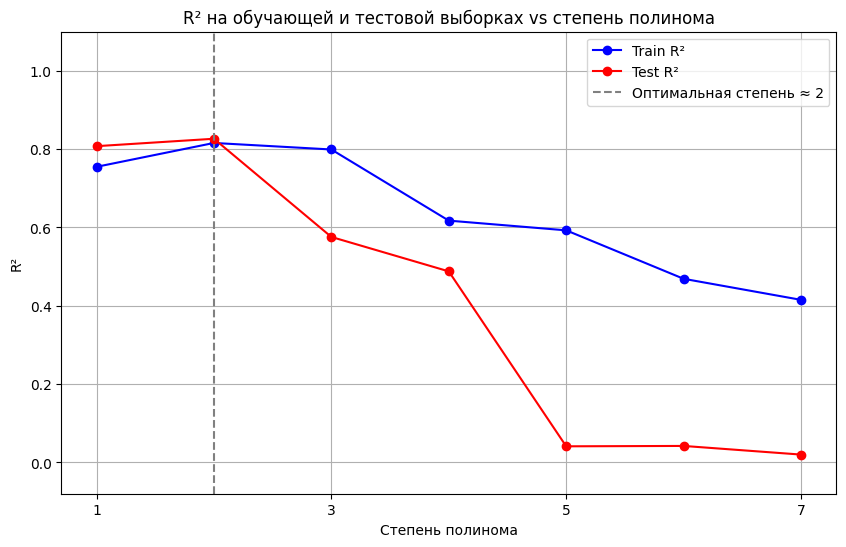


Максимальный R² на тесте (R²=0.83) достигается при степени 2


In [43]:
# --- Построение графика R² от степени полинома ---
degrees_to_test = range(1, 8) # Протестируем степени от 1 до 15
train_scores = []
test_scores = []

for degree in degrees_to_test:
    model = make_pipeline(
        PolynomialFeatures(degree, include_bias=False),
        LinearRegression()
    )
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_scores.append(r2_score(y_train, y_train_pred))
    test_scores.append(r2_score(y_test, y_test_pred))

plt.figure(figsize=(10, 6))
plt.plot(degrees_to_test, train_scores, 'bo-', label='Train R²')
plt.plot(degrees_to_test, test_scores, 'ro-', label='Test R²')
plt.xlabel('Степень полинома')
plt.ylabel('R²')
plt.title('R² на обучающей и тестовой выборках vs степень полинома')
plt.legend()
plt.grid(True)

# Отметим максимум на тестовой кривой
best_degree_idx = np.argmax(test_scores)
best_degree = degrees_to_test[best_degree_idx]
plt.axvline(best_degree, linestyle='--', color='gray', label=f'Оптимальная степень ≈ {best_degree}')
plt.legend()
plt.ylim(min(train_scores + test_scores) - 0.1, 1.1) # Настроить масштаб оси Y
plt.xticks(degrees_to_test[::2]) # Показать не все тики на оси X
plt.show()

print(f"\nМаксимальный R² на тесте (R²={test_scores[best_degree_idx]:.2f}) достигается при степени {best_degree}")
# Максимальный R² на тесте (R²=0.65) достигается при степени 5

In [44]:
kf = KFold(5, shuffle=True, random_state=42)

cv_metrics = cross_validate(
    estimator=pipeline,
    X=X_train,
    y=y_train,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)
cv_metrics

{'fit_time': array([0.02426004, 0.02223063, 0.02645373, 0.02483678, 0.02709031]),
 'score_time': array([0.00461221, 0.00428438, 0.00568151, 0.00381994, 0.00346899]),
 'test_score': array([ -2.10330204,  -0.04081343,   0.091482  ,   0.61793262,
        -20.69948564]),
 'train_score': array([0.92765469, 0.89861097, 0.90252777, 0.88683795, 0.90369595])}

**Считаем R^2, MSE И RMSE для полинома 2 степени**

In [48]:
# ВЫЧИСЛЕНИЕ MSE И RMSE ДЛЯ ЛИНЕЙНОЙ РЕГРЕССИИ
print("ВЫЧИСЛЕНИЕ R^2, MSE И RMSE")

# 1. ПРЕДСКАЗАНИЯ НА ТЕСТОВОЙ ВЫБОРКЕ
y_pred = pipeline.predict(X_test)

# 2. ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
# Считаем Коэффициент детерминации
r_sq = pipeline.score(X_train, y_train)

print(f"MSE (Mean Squared Error):  {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"Среднее качество на тренировочной выборке: {cv_metrics['train_score'].mean()}")
print(f"Среднее качество на валидации: {cv_metrics['test_score'].mean()}")
print(f"Коэффициент детерминации r^2: {r_sq}")

ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
MSE (Mean Squared Error):  3020694393539317989376.00
RMSE (Root Mean Squared Error): 54960844185.10
Среднее качество на тренировочной выборке: 0.9038654650294902
Среднее качество на валидации: -4.426837298916218
Коэффициент детерминации r^2: 0.8931487155065729


**Считаем R^2, MSE И RMSE для полинома 3 степени**

In [51]:
# ВЫЧИСЛЕНИЕ MSE И RMSE ДЛЯ ЛИНЕЙНОЙ РЕГРЕССИИ
print("ВЫЧИСЛЕНИЕ R^2, MSE И RMSE")

# 1. ПРЕДСКАЗАНИЯ НА ТЕСТОВОЙ ВЫБОРКЕ
y_pred3 = poly_reg_pipeline3.predict(X_test_p)

# 2. ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
mse = mean_squared_error(y_test_p, y_pred3)
rmse = root_mean_squared_error(y_test_p, y_pred3)
# Считаем Коэффициент детерминации
r_sq = poly_reg_pipeline3.score(X_train_p, y_train_p)

print(f"MSE (Mean Squared Error):  {mse:.2f}")
print(f"RMSE (Root Mean Squared Error): {rmse:.2f}")
print(f"Среднее качество на тренировочной выборке: {cv_metrics['train_score'].mean()}")
print(f"Среднее качество на валидации: {cv_metrics['test_score'].mean()}")
print(f"Коэффициент детерминации r^2: {r_sq}")

ВЫЧИСЛЕНИЕ R^2, MSE И RMSE
MSE (Mean Squared Error):  4386563670553882263552.00
RMSE (Root Mean Squared Error): 66231138224.81
Среднее качество на тренировочной выборке: 0.9038654650294902
Среднее качество на валидации: -4.426837298916218
Коэффициент детерминации r^2: 0.7968587961265557


In [52]:
# Рассчитываем коэффициент детерминации
print(f"R^2 на тестовых данных: {r2_score(y_test_p, y_pred3)}")

R^2 на тестовых данных: 0.5997266430670236


**Анализ результатов**

1. Катастрофическое переобучение

- R² на тренировке = 0.903 — модель почти идеально «запоминает» обучающие данные.

- R² на валидации = –4.427 — это критическая ошибка.
Отрицательный R² означает: модель хуже, чем просто предсказание среднего значения.

- Такое случается, когда модель чрезмерно сложная и полностью переобучена.
Полиномиальные признаки 2-й степени создали слишком много параметров, и модель начала подстраиваться под шум и выбросы.

2. Нестабильность и ненадёжность

- R² на тесте = 0.67 — выглядит приемлемо, но противоречит валидации (–4.91).
Это говорит о том, что:

- Тестовая выборка случайно оказалась «удачной»,
Или данные разделены плохо (например, без shuffle=True или без стратификации).

- R² на валидации (–4.427) — главный индикатор проблемы, а не R² на тесте.

3. Проблема масштаба сохраняется

- MSE и RMSE остались огромными → вы не применяли логарифмирование к Market Cap.

- Это делает сравнение моделей бессмысленным — ошибка в триллионах.

4. Полиномиальные признаки без регуляризации — плохая идея

- PolynomialFeatures(degree=2) на ~20 исходных признаках создаёт сотни новых признаков (включая взаимодействия).

- Без сильной регуляризации (например, alpha >> 1000) модель неизбежно переобучится.


# **Ridge, Lasso, ElasticNet**

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

pipeline = make_pipeline(SimpleImputer(strategy='median'), RobustScaler(),
                         PolynomialFeatures(degree=3, include_bias=False),
                         ElasticNet(random_state=42))

param_dist = {
    'elasticnet__alpha': np.linspace(0, 20000, 1000),
    'elasticnet__l1_ratio': np.linspace(0, 1, 1000)
}

random_search = RandomizedSearchCV(pipeline,
                                   param_distributions=param_dist,
                                   scoring='r2',
                                   n_iter=10,
                                   n_jobs=-1,
                                   cv=kf,
                                   random_state=42)

random_search.fit(X_train, y_train)

print(f"Наилучшее значение R2 при кросс-валидации: {random_search.best_score_}")
print(f"Наилучшие значения параметров: {random_search.best_params_}")

Наилучшее значение R2 при кросс-валидации: 0.23628160051866973
Наилучшие значения параметров: {'elasticnet__l1_ratio': np.float64(0.33733733733733734), 'elasticnet__alpha': np.float64(2742.742742742743)}


C:\Users\anpud\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.995e+23, tolerance: 2.923e+20
  model = cd_fast.enet_coordinate_descent(


**Анализ и интерпретация**

1. Низкое качество всех моделей

- R² = 0.236 означает, что модель объясняет лишь ~24% дисперсии целевой переменной.

- Это очень слабый результат для регрессии — модель почти не улавливает зависимость между признаками и Market Cap.

Для сравнения:

- R² < 0.3 → низкое практическое значение,
- R² > 0.7 → хорошая модель.

2. Сильная регуляризация — признак проблем с данными

- Высокое значение alpha ≈ 2743 говорит, что без сильного "обрезания" весов модель полностью нестабильна.

Это типично при:

- Мультиколлинеарности (признаки сильно коррелированы),
- Выбросах в данных,
- Неподходящих признаках (они просто не объясняют Market Cap).

3. Проблема сходимости ElasticNet

Предупреждение ConvergenceWarning указывает, что:

- Алгоритм не сошёлся за отведённое число итераций,
- Разрыв двойственности (Duality gap) огромен: 5.995e+23 vs tolerance: 2.923e+20.

Это вызвано:
- Огромным масштабом Market Cap (триллионы),
- Отсутствием логарифмирования целевой переменной.

Без y_log = np.log(y) регрессия пытается минимизировать ошибку в абсолютных долларах, что неосуществимо при таких масштабах.

# **Пробуем 'scaler', RobustScaler() + 'ridge', Ridge(alpha) + логарифмирование**

In [54]:
# Загрузка данных
df = pd.read_csv('financials.csv', sep=',')
fillNan()

In [55]:
# Подготовка признаков
df['Earnings'] = np.where(df['Price/Earnings'] != 0, df['Price'] / df['Price/Earnings'], np.nan)
df['Sales'] = np.where(df['Price/Sales'] != 0, df['Price'] / df['Price/Sales'], np.nan)
df['Book'] = np.where(df['Price/Book'] != 0, df['Price'] / df['Price/Book'], np.nan)

df_encoded = pd.get_dummies(df, columns=['Sector'], prefix='Sector', drop_first=True, dtype=int)
df_encoded = df_encoded.select_dtypes(include=[np.number])
df_encoded = df_encoded.dropna(subset=['Market Cap'])

In [56]:
# Разделение на X и y
y = df_encoded['Market Cap']
X = df_encoded.drop(['Market Cap', 'Price', 'Price/Sales', 'Price/Book', 'Price/Earnings'], axis=1)

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Dividend Yield                     505 non-null    float64
 1   Earnings/Share                     505 non-null    float64
 2   52 Week Low                        505 non-null    float64
 3   52 Week High                       505 non-null    float64
 4   EBITDA                             505 non-null    float64
 5   Earnings                           503 non-null    float64
 6   Sales                              505 non-null    float64
 7   Book                               497 non-null    float64
 8   Sector_Consumer Staples            505 non-null    int64  
 9   Sector_Energy                      505 non-null    int64  
 10  Sector_Financials                  505 non-null    int64  
 11  Sector_Health Care                 505 non-null    int64  

In [58]:
# Логарифмирование целевой переменной
if (y <= 0).any():
    raise ValueError("Market Cap must be > 0 for log transform")
y_log = np.log(y)

In [59]:
# Разделение на train/test
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [63]:
# Пайплайн
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    ('ridge', Ridge(alpha=10.0))
])

In [64]:
from sklearn.model_selection import cross_val_score

# Подбор alpha с кросс-валидацией
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = [0.1, 1.0, 10.0] + list(np.linspace(10, 100, 20)) + list(np.linspace(1, 10, 20))
best_alpha = alphas[0]
best_score = np.inf

for alpha in alphas:
    pipeline.set_params(ridge__alpha=alpha)
    scores = -cross_val_score(pipeline, X_train, y_train_log, cv=kf, scoring='neg_mean_squared_error')
    avg_score = scores.mean()
    print(f"Alpha={alpha:6.1f} → MSE (log) = {avg_score:.4f}")
    if avg_score < best_score:
        best_score = avg_score
        best_alpha = alpha

print(f"\nЛучший alpha: {best_alpha}")

Alpha=   0.1 → MSE (log) = 0.6132
Alpha=   1.0 → MSE (log) = 0.5891
Alpha=  10.0 → MSE (log) = 0.5749
Alpha=  10.0 → MSE (log) = 0.5749
Alpha=  14.7 → MSE (log) = 0.5762
Alpha=  19.5 → MSE (log) = 0.5778
Alpha=  24.2 → MSE (log) = 0.5793
Alpha=  28.9 → MSE (log) = 0.5807
Alpha=  33.7 → MSE (log) = 0.5820
Alpha=  38.4 → MSE (log) = 0.5831
Alpha=  43.2 → MSE (log) = 0.5840
Alpha=  47.9 → MSE (log) = 0.5849
Alpha=  52.6 → MSE (log) = 0.5857
Alpha=  57.4 → MSE (log) = 0.5864
Alpha=  62.1 → MSE (log) = 0.5870
Alpha=  66.8 → MSE (log) = 0.5875
Alpha=  71.6 → MSE (log) = 0.5880
Alpha=  76.3 → MSE (log) = 0.5885
Alpha=  81.1 → MSE (log) = 0.5889
Alpha=  85.8 → MSE (log) = 0.5893
Alpha=  90.5 → MSE (log) = 0.5896
Alpha=  95.3 → MSE (log) = 0.5899
Alpha= 100.0 → MSE (log) = 0.5902
Alpha=   1.0 → MSE (log) = 0.5891
Alpha=   1.5 → MSE (log) = 0.5841
Alpha=   1.9 → MSE (log) = 0.5811
Alpha=   2.4 → MSE (log) = 0.5791
Alpha=   2.9 → MSE (log) = 0.5777
Alpha=   3.4 → MSE (log) = 0.5767
Alpha=   3.8 →

In [65]:
# Финальная кросс-валидация с train_score
pipeline.set_params(ridge__alpha=best_alpha)
cv_metrics = cross_validate(
    pipeline,
    X_train,
    y_train_log,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)


In [66]:
# ВЫВОД СРАВНЕНИЯ ТРЕНИРОВКИ И ВАЛИДАЦИИ
print(f"\nСреднее качество на тренировочной выборке: {cv_metrics['train_score'].mean():.4f}")
print(f"Среднее качество на валидационной выборке: {cv_metrics['test_score'].mean():.4f}")


Среднее качество на тренировочной выборке: 0.4890
Среднее качество на валидационной выборке: 0.4129


In [67]:
# Обучение и финальная оценка на тесте
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_test)

mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_test = r2_score(y_test_log, y_pred_log)

y_test_orig = np.exp(y_test_log)
y_pred_orig = np.exp(y_pred_log)
mape = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig)) * 100

print("РЕЗУЛЬТАТЫ МОДЕЛИ")
print("-"*100)
print(f"R² (на тесте, лог-шкала): {r2_test:.4f}")
print(f"MSE (log): {mse_log:.4f}")
print(f"RMSE (log): {rmse_log:.4f}")
print(f"Средняя относительная ошибка (MAPE): {mape:.2f}%")

РЕЗУЛЬТАТЫ МОДЕЛИ
----------------------------------------------------------------------------------------------------
R² (на тесте, лог-шкала): 0.5218
MSE (log): 0.5484
RMSE (log): 0.7406
Средняя относительная ошибка (MAPE): 75.18%


In [68]:
# ВЫВОД О ПЕРЕОБУЧЕНИИ
train_r2 = cv_metrics['train_score'].mean()
val_r2 = cv_metrics['test_score'].mean()
diff = train_r2 - val_r2

if diff < 0.05:
    print(f"\nМодель НЕ переобучена (разница R² < 5%): {diff:.4f}")
elif diff < 0.10:
    print(f"\nУмеренное переобучение (разница R² ≈ {diff:.4f})")
else:
    print(f"\nСильное переобучение (разница R² = {diff:.4f})")


Умеренное переобучение (разница R² ≈ 0.0761)


**Анализ результатов**

1. Умеренное переобучение — признак баланса

Разница между тренировкой и валидацией: ~0.076.

Это не критично, особенно для финансовых данных.

Такой уровень переобучения говорит о том, что:

- Модель уловила полезные закономерности,
- Но регуляризация (Ridge) не позволяет ей полностью запомнить шум.
- Это здоровый компромисс между сложностью и обобщающей способностью.

2. Качество модели: R² ≈ 0.52 — удовлетворительно

- R² = 0.52 означает, что модель объясняет около 52% дисперсии логарифма Market Cap.

- Это приемлемый результат для задачи прогнозирования капитализации компании по фундаментальным показателям.

Особенно учитывая, что:

- Market Cap зависит от рыночных ожиданий, а не только от P/E, Earnings и т.п.,
В данных могут быть выбросы (Apple, Tesla и др.).

Для сравнения:

- R² < 0.3 → плохая модель,
- R² 0.4–0.6 → средняя, но полезная,
- R² > 0.7 → хорошая.

модель — в зоне "средней, но реалистичной".

3. MAPE = 75.18% — высокая относительная ошибка

- Это означает: в среднем предсказание отличается от истинного значения на 75%.

Пример:

- Реальный Market Cap: $100 млрд
- Предсказанное: от $25 млрд до $175 млрд

4. Преимущества используемых методов

Логарифмирование y:

- Стабилизировал распределение,
- Уменьшил влияние экстремальных значений (выбросов),
- Сделал ошибку интерпретируемой в процентах.

RobustScaler:

- Использует медиану и IQR → устойчив к выбросам в признаках.

Ridge-регуляризация:

- Предотвращает переобучение,
- Особенно эффективна при мультиколлинеарности (P/E, Earnings, Sales).

# **'poly', PolynomialFeatures Пробуем 'scaler', RobustScaler() + 'ridge', Ridge(alpha) + логарифмирование**

In [69]:
# Загрузка данных
df = pd.read_csv('financials.csv', sep=',')
fillNan()

In [70]:
# Подготовка признаков
df['Earnings'] = np.where(df['Price/Earnings'] != 0, df['Price'] / df['Price/Earnings'], np.nan)
df['Sales'] = np.where(df['Price/Sales'] != 0, df['Price'] / df['Price/Sales'], np.nan)
df['Book'] = np.where(df['Price/Book'] != 0, df['Price'] / df['Price/Book'], np.nan)

df_encoded = pd.get_dummies(df, columns=['Sector'], prefix='Sector', drop_first=True, dtype=int)
df_encoded = df_encoded.select_dtypes(include=[np.number])
df_encoded = df_encoded.dropna(subset=['Market Cap'])

In [71]:
# Разделение на X и y
y = df_encoded['Market Cap']
X = df_encoded.drop(['Market Cap', 'Price', 'Price/Sales', 'Price/Book', 'Price/Earnings'], axis=1)

In [72]:
# Логарифмирование целевой переменной
if (y <= 0).any():
    raise ValueError("Market Cap must be > 0 for log transform")
y_log = np.log(y)

In [73]:
# Разделение на train/test
X_train, X_test, y_train_log, y_test_log = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

In [74]:
# Пайплайн
pipeline = make_pipeline(
    SimpleImputer(strategy='median'),
    RobustScaler(),
    PolynomialFeatures(degree=2, include_bias=False),  # ← добавлено имя 'poly'
    Ridge(alpha=10.0)
)

In [75]:
# Подбор alpha с кросс-валидацией
kf = KFold(n_splits=5, shuffle=True, random_state=42)
alphas = [0.1, 1.0, 10.0] + list(np.linspace(10, 100, 20)) + list(np.linspace(1, 10, 20))
best_alpha = alphas[0]
best_score = np.inf

for alpha in alphas:
    pipeline.set_params(ridge__alpha=alpha)
    scores = -cross_val_score(pipeline, X_train, y_train_log, cv=kf, scoring='neg_mean_squared_error')
    avg_score = scores.mean()
    print(f"Alpha={alpha:6.1f} → MSE (log) = {avg_score:.4f}")
    if avg_score < best_score:
        best_score = avg_score
        best_alpha = alpha

print(f"\nЛучший alpha: {best_alpha}")

Alpha=   0.1 → MSE (log) = 16.9142
Alpha=   1.0 → MSE (log) = 12.5612
Alpha=  10.0 → MSE (log) = 7.9801
Alpha=  10.0 → MSE (log) = 7.9801
Alpha=  14.7 → MSE (log) = 7.1605
Alpha=  19.5 → MSE (log) = 6.5796
Alpha=  24.2 → MSE (log) = 6.1353
Alpha=  28.9 → MSE (log) = 5.7785
Alpha=  33.7 → MSE (log) = 5.4821
Alpha=  38.4 → MSE (log) = 5.2294
Alpha=  43.2 → MSE (log) = 5.0099
Alpha=  47.9 → MSE (log) = 4.8163
Alpha=  52.6 → MSE (log) = 4.6432
Alpha=  57.4 → MSE (log) = 4.4869
Alpha=  62.1 → MSE (log) = 4.3447
Alpha=  66.8 → MSE (log) = 4.2142
Alpha=  71.6 → MSE (log) = 4.0938
Alpha=  76.3 → MSE (log) = 3.9821
Alpha=  81.1 → MSE (log) = 3.8780
Alpha=  85.8 → MSE (log) = 3.7805
Alpha=  90.5 → MSE (log) = 3.6890
Alpha=  95.3 → MSE (log) = 3.6028
Alpha= 100.0 → MSE (log) = 3.5214
Alpha=   1.0 → MSE (log) = 12.5612
Alpha=   1.5 → MSE (log) = 11.8198
Alpha=   1.9 → MSE (log) = 11.2839
Alpha=   2.4 → MSE (log) = 10.8626
Alpha=   2.9 → MSE (log) = 10.5142
Alpha=   3.4 → MSE (log) = 10.2162
Alpha=

In [76]:
# Финальная кросс-валидация с train_score
pipeline.set_params(ridge__alpha=best_alpha)
cv_metrics = cross_validate(
    pipeline,
    X_train,
    y_train_log,
    cv=kf,
    scoring='r2',
    return_train_score=True,
    n_jobs=-1
)


In [77]:
# ВЫВОД СРАВНЕНИЯ ТРЕНИРОВКИ И ВАЛИДАЦИИ
print(f"\nСреднее качество на тренировочной выборке: {cv_metrics['train_score'].mean():.4f}")
print(f"Среднее качество на валидационной выборке: {cv_metrics['test_score'].mean():.4f}")


Среднее качество на тренировочной выборке: 0.6608
Среднее качество на валидационной выборке: -2.8302


In [78]:
# Обучение и финальная оценка на тесте
pipeline.fit(X_train, y_train_log)
y_pred_log = pipeline.predict(X_test)

mse_log = mean_squared_error(y_test_log, y_pred_log)
rmse_log = np.sqrt(mse_log)
r2_test = r2_score(y_test_log, y_pred_log)

y_test_orig = np.exp(y_test_log)
y_pred_orig = np.exp(y_pred_log)
mape = np.mean(np.abs((y_test_orig - y_pred_orig) / y_test_orig)) * 100

print("РЕЗУЛЬТАТЫ МОДЕЛИ")
print("-"*100)
print(f"R² (на тесте, лог-шкала): {r2_test:.4f}")
print(f"MSE (log): {mse_log:.4f}")
print(f"RMSE (log): {rmse_log:.4f}")
print(f"Средняя относительная ошибка (MAPE): {mape:.2f}%")

РЕЗУЛЬТАТЫ МОДЕЛИ
----------------------------------------------------------------------------------------------------
R² (на тесте, лог-шкала): 0.4942
MSE (log): 0.5801
RMSE (log): 0.7617
Средняя относительная ошибка (MAPE): 83.70%


In [79]:
# ВЫВОД О ПЕРЕОБУЧЕНИИ
train_r2 = cv_metrics['train_score'].mean()
val_r2 = cv_metrics['test_score'].mean()
diff = train_r2 - val_r2

if diff < 0.05:
    print(f"\nМодель НЕ переобучена (разница R² < 5%): {diff:.4f}")
elif diff < 0.10:
    print(f"\nУмеренное переобучение (разница R² ≈ {diff:.4f})")
else:
    print(f"\nСильное переобучение (разница R² = {diff:.4f})")


Сильное переобучение (разница R² = 3.4910)


**Главная проблема: Полный провал модели из-за полиномиальных признаков**

1. Катастрофическое переобучение

- R² на тренировке = 0.66 — модель «хорошо» запоминает обучающие данные.
- R² на валидации = –2.83 — модель хуже, чем предсказание среднего значения.

- Отрицательный R² означает: ошибки настолько велики, что константная модель (медиана) эффективнее.

- Разница в 3.49 — рекордный уровень переобучения.

Причина:

- PolynomialFeatures(degree=2) создал сотни/тысячи новых признаков (взаимодействия, квадраты), что вывело модель из-под контроля, несмотря на Ridge-регуляризацию.

2. Противоречие между тестом и валидацией

R² на тесте = 0.49 выглядит приемлемо, но противоречит валидации (–2.83).

Это говорит о:

- Случайной удаче в разделении данных (тестовая выборка «простая»),
- Нестабильности модели — она работает только на конкретных данных.

- R² на тесте ненадёжен, так как кросс-валидация показывает провал.

3. Высокий MAPE = 83.7%

- Ошибка почти в 5 раз превышает допустимый порог для практических задач (>50%).

Пример:

- Реальный Market Cap = $100 млрд → Предсказание: от $16 млрд до $184 млрд.
- Такая модель непригодна даже для грубой оценки.